In [1]:
import os
import shutil

## Almacena los xlsx o csv de las carpetas y los deja en una carpeta donde seran tomados para consolidar la info

def organizar_pdfs(CarpetaRaiz, CarpetaPrincipal):
    # Se crea la carpeta 'Pdfs' si no existe en la carpeta raíz
    CarpetaPdf = os.path.join(CarpetaRaiz, "Excel Consolidada")
    if not os.path.exists(CarpetaPdf):
        os.makedirs(CarpetaPdf)

    # Función para mover los archivos PDF de una carpeta a la carpeta Pdfs
    def mover_archivos(Carpeta):
        if os.path.isdir(Carpeta):
            for Archivo in os.listdir(Carpeta):
                extension = os.path.splitext(Archivo)[1].lower()
                if extension in ['.xlsx', '.csv', '.sheets']:
                    rutaArchivo = os.path.join(Carpeta, Archivo)
                    shutil.move(rutaArchivo, CarpetaPdf)

    # Función que recorre los directorios ubicados en la carpeta principal
    def recorrer_carpetas(Carpeta):
        for Archivo in os.listdir(Carpeta):
            Path = os.path.join(Carpeta, Archivo)
            if os.path.isfile(Path):
                mover_archivos(Carpeta)
            elif os.path.isdir(Path):
                recorrer_carpetas(Path)

    # Se asigna la ruta de la carpeta principal a recorrer, donde se extraen los Pdfs
    CarpetaPrincipal = os.path.abspath(CarpetaPrincipal)
    print(CarpetaPrincipal)
    recorrer_carpetas(CarpetaPrincipal)

# Uso de la función
CarpetaRaiz = "/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/"
CarpetaPrincipal = "/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/DATA ESTACIONES"
organizar_pdfs(CarpetaRaiz, CarpetaPrincipal)


/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/DATA ESTACIONES


In [4]:
import pandas as pd
import os
import time

def consolidar_archivos_csv_xlsx(directorio):
    # Inicializa un DataFrame vacío para almacenar los datos consolidados
    #df_consolidado = pd.DataFrame()
    lista_dataframes = []

    # Itera sobre todos los archivos en el directorio
    for archivo in os.listdir(directorio):
        print(archivo)
        # Verifica si el archivo es un archivo CSV o Excel
        if archivo.endswith(".csv"):
            # Lee el archivo CSV y lo agrega al DataFrame consolidado
            ruta_archivo = os.path.join(directorio, archivo)
            df = pd.read_csv(ruta_archivo)
            df.columns = df.columns.str.strip()
            lista_dataframes.append(df)
            #df_consolidado = df_consolidado.append(df, ignore_index=True)
        elif archivo.endswith(".xlsx"):
            # Lee el archivo Excel y lo agrega al DataFrame consolidado
            ruta_archivo = os.path.join(directorio, archivo)
            df = pd.read_excel(ruta_archivo)
            df.columns = df.columns.str.strip()
            lista_dataframes.append(df)
            #df_consolidado = df_consolidado.append(df, ignore_index=True)
            
        valores_estacion = [34.3, 30.3, 27.3, 24.7, 30.6, 26.7, 27.4, None, 23.3, 17, 12.3,
                    21.9, 30.7, 41.5, 30.2, 29.5, 20.9, 19.5, 22.5, 31.4, 22.8, 19]
        if any('Unnamed' in col for col in df.columns):
            print("Al menos un encabezado contiene 'Unnamed'.")
            print(archivo)
            break
            
        if any('Estación' in col for col in df.columns):
            print("Al menos un encabezado contiene 'Unnamed'.")
            print(archivo)
            break
        #filas_filtradas = df[df['Estacion'].isin(valores_estacion)]
        #print(filas_filtradas)
        
        #if len(filas_filtradas) > 0:
        #    print("Hay filas filtradas.")
        #    print(archivo)
        #    break

        
        #print(lista_dataframes)
        #time.sleep(1)
            
    df_consolidado = pd.concat(lista_dataframes, ignore_index=True)
    
    
    return df_consolidado

# Ejemplo de uso
directorio = "/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/Excel Consolidada"  # Cambia esto por la ruta de tu directorio
df_final = consolidar_archivos_csv_xlsx(directorio)


USAQUEN_2020.xlsx
Bolivia_2021.xlsx
Al menos un encabezado contiene 'Unnamed'.
Bolivia_2021.xlsx


In [3]:
df_final

,DateTime,Estacion,PM10(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm),PM2.5(µg/m3),OZONO(ppb),CO(ppm),SO2(ppb),Estación,Rad Solar(W/M²),Presion Baro(mmHg)
0,01-01-2020 01:00,Usaquen,17,----,----,----,1.1,238,13,0,17,----,0.7,----,NaN,NaN,NaN
1,01-01-2020 02:00,Usaquen,----,----,----,----,1.1,153,12.7,0,23,----,0.7,----,NaN,NaN,NaN
2,01-01-2020 03:00,Usaquen,----,----,----,----,1.3,124,12.6,0,29,----,0.6,----,NaN,NaN,NaN
3,01-01-2020 04:00,Usaquen,----,----,----,----,0.7,128,11.7,0,36,----,0.6,----,NaN,NaN,NaN
4,01-01-2020 05:00,Usaquen,19,----,----,----,0.4,120,10.8,0,19,----,0.6,----,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635731,31-12-2020 20:00,Kennedy,----,6.8,27.9,34.7,0.3,243,13.8,0,43,11.6,1.3,0.4,NaN,NaN,NaN
635732,31-12-2020 21:00,Kennedy,49.1,24.9,34.7,59.5,0.3,39,13.9,0,37,5.7,1.7,0.4,NaN,NaN,NaN
635733,31-12-2020 22:00,Kennedy,----,22.3,32.3,54.6,0.4,14,14.2,0,60,5.8,1.6,0.4,NaN,NaN,NaN
635734,31-12-2020 23:00,Kennedy,----,4.7,26.1,30.8,0.5,338,14.2,0,48,9.7,1.2,0.4,NaN,NaN,NaN


In [6]:
df_final['Estación'].unique()

array([nan, 'Bolivia'], dtype=object)

In [6]:
filtro = (df_final['DateTime'].str.contains("24:00", na=False)) & (~df_final['DateTime'].isnull())
df_final.loc[filtro, 'DateTime'] = df_final.loc[filtro, 'DateTime'].str.replace("24:00", "23:59") #Validar porque falta agregar un dia cuando es las 00

In [7]:
import pandas as pd

def preparar_datos(df):
    # Suponiendo que tu DataFrame se llama df_final y la columna de fecha se llama 'dateTime'
    # Primero, convierte la columna 'dateTime' al tipo datetime
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')

    # Ahora, ordena el DataFrame por la columna de fecha
    df = df.sort_values(by='DateTime')
    # Reemplazar valores específicos por NaN
    df.replace(["----", "NaN", " "], None, inplace=True)

    # Convertir columnas numéricas al tipo de dato float
    columnas_numericas = [
        'PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)', 'NO2(ppb)', 'NOX(ppb)', 
        'SO2(ppb)', 'CO(ppm)', 'OZONO(ppb)', 'Vel Viento(m/s)', 'Dir Viento(Grados)', 
        'Temperatura(°C)', 'Presion Baro(mmHg)', 'Rad Solar(W/M²)', 'Precipitacion(mm)'
    ]
    df[columnas_numericas] = df[columnas_numericas].astype(float)

    # Reordenar las columnas del DataFrame en el orden de las columnas numéricas
    columnas_ordenadas = ['DateTime', 'Estacion'] + columnas_numericas + [col for col in df.columns if col not in columnas_numericas + ['DateTime', 'Estacion']]
    df = df[columnas_ordenadas]

    # Verificar valores nulos
    total_nulos = df.isnull().sum().sort_values(ascending=False)
    porcentaje_nulos = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    datos_faltantes = pd.concat([total_nulos, porcentaje_nulos*100], axis=1, keys=['Total', 'Percent'])

    return df, datos_faltantes

# Ejemplo de uso
df_final, datos_faltantes = preparar_datos(df_final)



In [8]:
df_final

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm)
0,2020-01-01 01:00:00,Usaquen,17.0,17.0,NaN,NaN,NaN,NaN,0.7,NaN,1.1,238.0,13.0,NaN,NaN,0.0
206928,2020-01-01 01:00:00,SanCristobal,50.0,11.1,NaN,NaN,NaN,NaN,NaN,9.4,0.1,57.0,11.7,NaN,11.0,0.0
54312,2020-01-01 01:00:00,MinAmbiente,26.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,259.0,NaN,NaN,NaN,0.0
215712,2020-01-01 01:00:00,Tunal,45.0,39.0,4.8,12.0,16.8,0.8,0.4,NaN,0.9,243.0,11.7,564.0,20.0,0.0
261264,2020-01-01 01:00:00,Suba,67.0,23.0,NaN,NaN,NaN,1.1,NaN,6.3,0.4,174.0,11.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261263,2024-02-05 23:59:00,Usme,42.2,13.6,51.7,22.7,74.4,3.7,1.4,0.3,NaN,NaN,14.1,563.0,0.0,0.0
270911,2024-02-05 23:59:00,MinAmbiente,21.0,6.0,6.9,12.0,18.9,NaN,NaN,1.1,0.8,162.0,NaN,NaN,NaN,0.0
135095,2024-02-05 23:59:00,LasFerias,33.2,22.0,72.3,26.5,98.8,NaN,1.4,0.3,1.2,89.0,14.2,565.0,NaN,0.0
10511,2024-02-05 23:59:00,SanCristobal,13.0,7.0,5.1,12.0,17.1,NaN,0.4,1.4,1.5,108.0,12.0,NaN,0.0,0.0


In [9]:
df_final['Estacion'].unique()

array(['Usaquen', 'SanCristobal', 'MinAmbiente', 'Tunal', 'Suba',
       'LasFerias', 'MovilSeptima', 'Kennedy', 'PuenteAranda', 'Usme',
       'Usaquen ', 'Tunal ', 'MovilFontibon', 'Kennedy '], dtype=object)

In [10]:
datos_faltantes

,Total,Percent
Presion Baro(mmHg),199382,52.770014
Rad Solar(W/M²),199381,52.769750
SO2(ppb),175217,46.374315
OZONO(ppb),81091,21.462184
Dir Viento(Grados),79462,21.031040
Vel Viento(m/s),78371,20.742288
Temperatura(°C),76833,20.335228
CO(ppm),73950,19.572191
NO(ppb),73061,19.336901
NO2(ppb),73058,19.336107


In [11]:
# Calcular el umbral para la eliminación de columnas
umbral_porcentaje = 30
porcentaje_umbral = umbral_porcentaje / 100
umbral_columnas = porcentaje_umbral * df_final.shape[0]

# Identificar columnas que tienen más del 30% de valores faltantes
columnas_a_eliminar = datos_faltantes[datos_faltantes['Percent'] > umbral_porcentaje].index
print(columnas_a_eliminar)

df_final = df_final.drop(columnas_a_eliminar, axis=1)
df_final

Index(['Presion Baro(mmHg)', 'Rad Solar(W/M²)', 'SO2(ppb)'], dtype='object')


,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm)
0,2020-01-01 01:00:00,Usaquen,17.0,17.0,NaN,NaN,NaN,0.7,NaN,1.1,238.0,13.0,0.0
206928,2020-01-01 01:00:00,SanCristobal,50.0,11.1,NaN,NaN,NaN,NaN,9.4,0.1,57.0,11.7,0.0
54312,2020-01-01 01:00:00,MinAmbiente,26.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,259.0,NaN,0.0
215712,2020-01-01 01:00:00,Tunal,45.0,39.0,4.8,12.0,16.8,0.4,NaN,0.9,243.0,11.7,0.0
261264,2020-01-01 01:00:00,Suba,67.0,23.0,NaN,NaN,NaN,NaN,6.3,0.4,174.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261263,2024-02-05 23:59:00,Usme,42.2,13.6,51.7,22.7,74.4,1.4,0.3,NaN,NaN,14.1,0.0
270911,2024-02-05 23:59:00,MinAmbiente,21.0,6.0,6.9,12.0,18.9,NaN,1.1,0.8,162.0,NaN,0.0
135095,2024-02-05 23:59:00,LasFerias,33.2,22.0,72.3,26.5,98.8,1.4,0.3,1.2,89.0,14.2,0.0
10511,2024-02-05 23:59:00,SanCristobal,13.0,7.0,5.1,12.0,17.1,0.4,1.4,1.5,108.0,12.0,0.0


In [12]:
from sklearn.impute import KNNImputer

def imputar_con_etiquetas(df, n_neighbors=2):
    # Guardar las etiquetas "DateTime" y "Estacion" en un nuevo DataFrame
    df_etiquetas = df[['DateTime', 'Estacion']]

    # Eliminar las etiquetas del DataFrame original
    df_sin_etiquetas = df.drop(['DateTime', 'Estacion'], axis=1)

    # Crear el KNNImputer
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Realizar la imputación sin las etiquetas
    after_imputation = imputer.fit_transform(df_sin_etiquetas)

    # Convertir el resultado de nuevo a un DataFrame
    after_imputation_df = pd.DataFrame(after_imputation, columns=df_sin_etiquetas.columns)

    # Concatenar las etiquetas "DateTime" y "Estacion" con el DataFrame imputado
    df_final = pd.concat([df_etiquetas, after_imputation_df], axis=1)

    return df_final

def interpolacion_con_etiquetas(df):
    # Guardar las etiquetas "DateTime" y "Estacion" en un nuevo DataFrame
    df_etiquetas = df[['DateTime', 'Estacion']]

    # Eliminar las etiquetas del DataFrame original
    df_sin_etiquetas = df.drop(['DateTime', 'Estacion'], axis=1)

    # Aplicar interpolación lineal para encontrar los valores faltantes
    df_interpolado = df_sin_etiquetas.interpolate(method='linear', axis=0)

    # Concatenar las etiquetas "DateTime" y "Estacion" con el DataFrame interpolado
    df_final = pd.concat([df_etiquetas, df_interpolado], axis=1)
    print(df_interpolado)

    return df_final

# Ejemplo de uso
df_Filtrado_Continuas = df_final # tu DataFrame original
df_final_imputado = interpolacion_con_etiquetas(df_Filtrado_Continuas)
#df_final_imputado = imputar_con_etiquetas(df_Filtrado_Continuas)



        PM10(µg/m3)  PM2.5(µg/m3)  NO(ppb)  NO2(ppb)  NOX(ppb)  CO(ppm)  \
0              17.0          17.0      NaN       NaN       NaN     0.70   
206928         50.0          11.1      NaN       NaN       NaN     0.60   
54312          26.0           9.0      NaN       NaN       NaN     0.50   
215712         45.0          39.0      4.8     12.00     16.80     0.40   
261264         67.0          23.0      4.8     13.95     18.75     0.45   
...             ...           ...      ...       ...       ...      ...   
261263         42.2          13.6     51.7     22.70     74.40     1.40   
270911         21.0           6.0      6.9     12.00     18.90     1.40   
135095         33.2          22.0     72.3     26.50     98.80     1.40   
10511          13.0           7.0      5.1     12.00     17.10     0.40   
369047         57.1          15.4     39.9     35.50     75.30     0.80   

        OZONO(ppb)  Vel Viento(m/s)  Dir Viento(Grados)  Temperatura(°C)  \
0              NaN     

In [13]:
# Verificar valores nulos posterior a la interpolacion, aqui validar otros metodos de inputacion
total_nulos = df_final_imputado.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (df_final_imputado.isnull().sum() / df_final_imputado .isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total_nulos, porcentaje_nulos*100], axis=1, keys=['Total', 'Percent'])
datos_faltantes

,Total,Percent
NO(ppb),3,0.000794
NO2(ppb),3,0.000794
NOX(ppb),3,0.000794
OZONO(ppb),1,0.000265
DateTime,0,0.000000
Estacion,0,0.000000
PM10(µg/m3),0,0.000000
PM2.5(µg/m3),0,0.000000
CO(ppm),0,0.000000
Vel Viento(m/s),0,0.000000


In [14]:
import numpy as np

# Validar si antes de imputar calcular el ica o posterior a la imputacion realizar el calculo

def calcular_ICA(contaminante, valor):
    Categorias = {
        'PM10(µg/m3)': {
            (0, 54): ('Buena', 50, 0),
            (55, 154): ('Moderada', 100, 51),
            (155, 254): ('Afecta Grupos Sensibles', 150, 101),
            (255, 354): ('Dañina', 200, 151),
            (355, 424): ('Muy Dañina', 300, 201),
            (425, 604): ('Peligroso', 500, 301),
        },
        'PM2.5(µg/m3)': {
            (0, 15.4): ('Buena', 50, 0),
            (15.5, 40.4): ('Moderada', 100, 51),
            (40.5, 65.4): ('Afecta Grupos Sensibles', 150, 101),
            (65.5, 150.4): ('Dañina', 200, 151),
            (150.5, 250.4): ('Muy Dañina', 300, 201),
            (250.5, 500.4): ('Peligroso', 500, 301),
        },
        'CO(ppm)': {
            (0, 4.4): ('Buena', 50, 0),
            (4.5, 9.4): ('Moderada', 100, 51),
            (9.5, 12.4): ('Afecta Grupos Sensibles', 150, 101),
            (12.5, 15.4): ('Dañina', 200, 151),
            (15.5, 30.4): ('Muy Dañina', 300, 201),
            (30.5, 50.4): ('Peligroso', 500, 301),
        },
        'OZONO(ppb)': {
            (0, 124): ('Buena', 100, 0),
            (125, 164): ('Afecta Grupos Sensibles', 150, 101),
            (165, 204): ('Dañina', 200, 151),
            (205, 404): ('Muy Dañina', 300, 201),
            (405, 604): ('Peligroso', 500, 301),
        },
        'NO2(ppb)': {
            (0, 650): ('Buena', 200, 0),
            (651, 1240): ('Muy Dañina', 300, 201),
            (1241, 2040): ('Peligroso', 500, 301),
        },
    }

    if pd.isnull(valor):
        CategoriaIca = 'Atipico'
        ICA = -100
    else:
        ICA = 0
        CategoriaIca = 'Atipico'
        rangos = Categorias.get(contaminante, {})
        for (CInf, CSup), (CategoriaIca, IcaSup, IcaInf) in rangos.items():
            if CInf <= valor <= CSup:
                ICA = ((IcaSup - IcaInf) / (CSup - CInf)) * (valor - CInf) + IcaInf
                break

    return ICA

# Lista de contaminantes
contaminantes = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO2(ppb)', 'OZONO(ppb)','CO(ppm)']

# Calcular el ICA para cada contaminante y cada registro
df_final_imputado['ICA'] = df_final_imputado.apply(lambda row: max([calcular_ICA(contaminante, row[contaminante]) for contaminante in contaminantes]), axis=1)

# Redondear el valor de los decimales en la columna 'ICA' a 2 decimales
df_final_imputado['ICA'] = df_final_imputado['ICA'].round(0)


In [15]:
ica_column = df_final_imputado.pop('ICA')
# Insertar la columna 'ICA' después de la columna 'Estacion'
df_final_imputado.insert(df_final_imputado.columns.get_loc('Estacion') + 1, 'ICA', ica_column)

In [16]:
df_final_imputado = df_final_imputado.reset_index(drop=True)
df_final_imputado

,DateTime,Estacion,ICA,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm)
0,2020-01-01 01:00:00,Usaquen,54.0,17.0,17.0,NaN,NaN,NaN,0.70,NaN,1.1,238.0,13.00,0.0
1,2020-01-01 01:00:00,SanCristobal,46.0,50.0,11.1,NaN,NaN,NaN,0.60,9.400000,0.1,57.0,11.70,0.0
2,2020-01-01 01:00:00,MinAmbiente,29.0,26.0,9.0,NaN,NaN,NaN,0.50,8.366667,1.0,259.0,11.70,0.0
3,2020-01-01 01:00:00,Tunal,97.0,45.0,39.0,4.8,12.00,16.80,0.40,7.333333,0.9,243.0,11.70,0.0
4,2020-01-01 01:00:00,Suba,66.0,67.0,23.0,4.8,13.95,18.75,0.45,6.300000,0.4,174.0,11.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377827,2024-02-05 23:59:00,Usme,44.0,42.2,13.6,51.7,22.70,74.40,1.40,0.300000,0.9,97.0,14.10,0.0
377828,2024-02-05 23:59:00,MinAmbiente,19.0,21.0,6.0,6.9,12.00,18.90,1.40,1.100000,0.8,162.0,14.15,0.0
377829,2024-02-05 23:59:00,LasFerias,64.0,33.2,22.0,72.3,26.50,98.80,1.40,0.300000,1.2,89.0,14.20,0.0
377830,2024-02-05 23:59:00,SanCristobal,23.0,13.0,7.0,5.1,12.00,17.10,0.40,1.400000,1.5,108.0,12.00,0.0


In [17]:
df_final_imputado[df_final_imputado['ICA']== 0]

,DateTime,Estacion,ICA,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm)


# Analisis de tiempo con dataframe imputado

In [18]:
#pip install auto-ts

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.90. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [20]:
df = df_final_imputado
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [21]:
def fill_na_with_mean(df_filtered, column):
    """ fill na with movil mean of 3 days"""
    df_filtered[column] = df_filtered[column].fillna(df_filtered[column].rolling(3, min_periods=1).mean())
    return df_filtered

estaciones = df.Estacion.unique()

# Aquí lo hago con solo la primer columna pero la ídea es que lo hagan con la columna que quieren predecir
# Creo que es el ICA pero no la vi, no estoy seguro

all_dfs = []
for estacion in estaciones:
    df_filtered = df[df.Estacion == estacion]
    df_filtered = fill_na_with_mean(df_filtered, 'ICA')
    df_filtered = df_filtered[['DateTime', 'Estacion','ICA']]
    all_dfs.append(df_filtered)

df_check = pd.concat(all_dfs).fillna(method='ffill')
df_check['DateTime'] = pd.to_datetime(df_check['DateTime'])
df_check['ICA'] = df_check['ICA'].astype('float')
df_check = df_check.sort_values(by=['DateTime', 'Estacion'])
df_check

,DateTime,Estacion,ICA
7,2020-01-01 01:00:00,Kennedy,118.0
5,2020-01-01 01:00:00,LasFerias,89.0
2,2020-01-01 01:00:00,MinAmbiente,29.0
6,2020-01-01 01:00:00,MovilSeptima,42.0
8,2020-01-01 01:00:00,PuenteAranda,28.0
...,...,...,...
377830,2024-02-05 23:59:00,SanCristobal,23.0
377826,2024-02-05 23:59:00,Suba,42.0
377824,2024-02-05 23:59:00,Tunal,66.0
377822,2024-02-05 23:59:00,Usaquen,42.0


In [22]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377832 entries, 7 to 377827
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DateTime  377832 non-null  datetime64[ns]
 1   Estacion  377832 non-null  object        
 2   ICA       377832 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.5+ MB


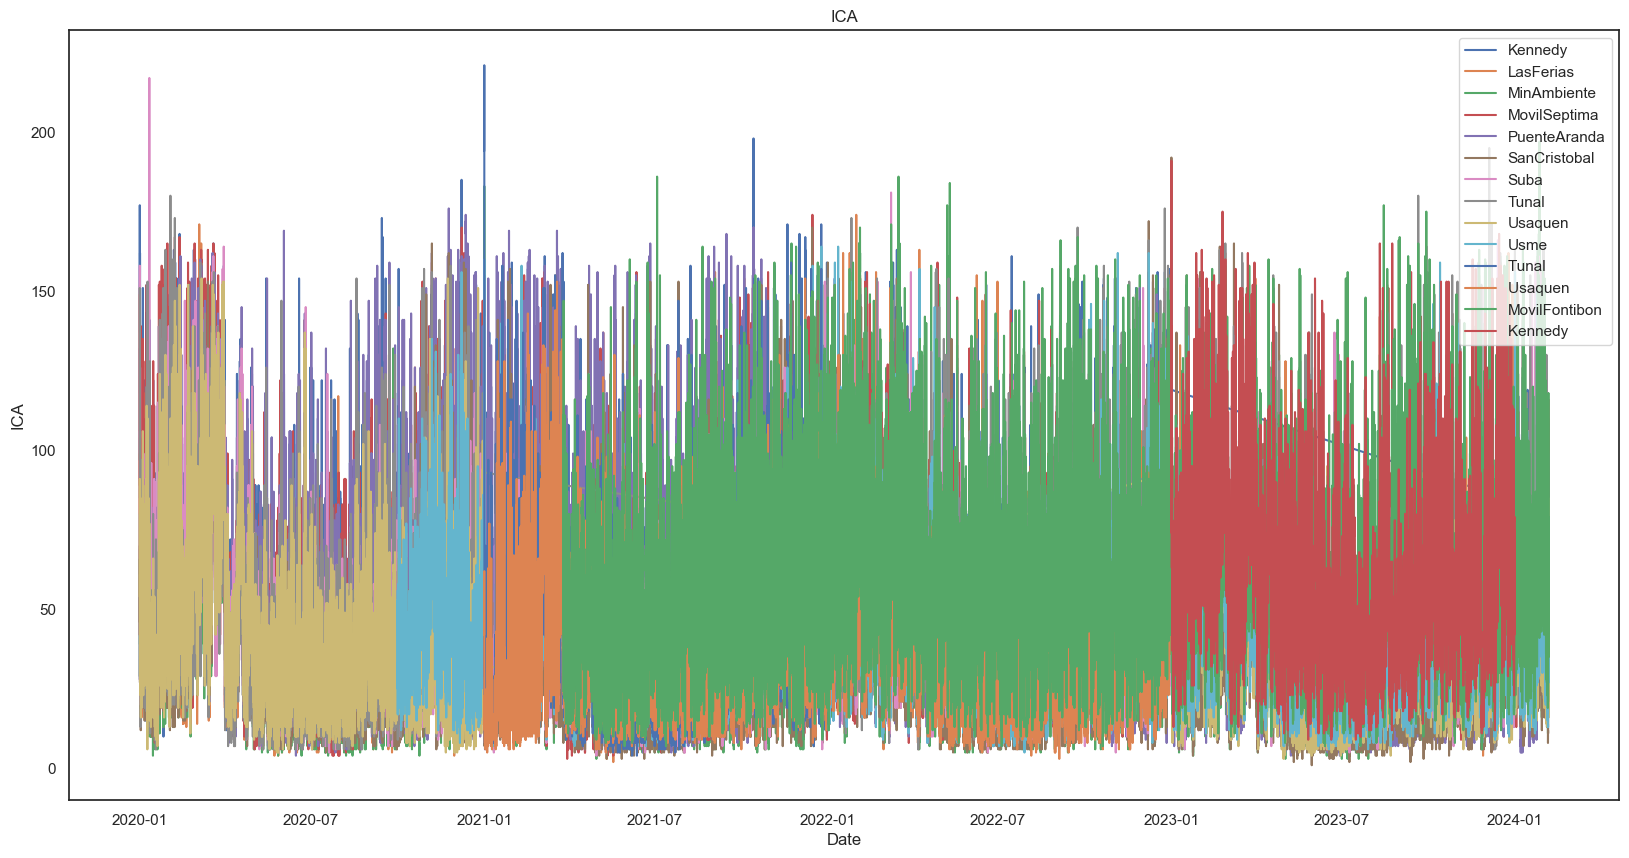

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'ICA'}, xlabel='Date', ylabel='ICA'>)

In [23]:
def plot_all_stations(df, column):
    """ plot all stations in the same figure"""
    fig, ax = plt.subplots(figsize=(20, 10))
    for estacion in df.Estacion.unique():
        df_filtered = df[df.Estacion == estacion]
        ax.plot(df_filtered.DateTime, df_filtered[column], label=estacion)
    ax.legend()
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    plt.show()
    return fig, ax

plot_all_stations(df_check, 'ICA')

In [24]:
train_df = df_check.iloc[:int(len(df_check) * 0.9)]
test_df = df_check.iloc[int(len(df_check) * 0.9):]
print(train_df.shape, test_df.shape)

(340048, 3) (37784, 3)


In [25]:
station_test = test_df.Estacion.unique()
station_test

array(['LasFerias', 'MinAmbiente', 'MovilFontibon', 'MovilSeptima',
       'PuenteAranda', 'SanCristobal', 'Suba', 'Tunal', 'Usaquen', 'Usme',
       'Kennedy ', 'Kennedy'], dtype=object)

In [26]:
train_df

,DateTime,Estacion,ICA
7,2020-01-01 01:00:00,Kennedy,118.0
5,2020-01-01 01:00:00,LasFerias,89.0
2,2020-01-01 01:00:00,MinAmbiente,29.0
6,2020-01-01 01:00:00,MovilSeptima,42.0
8,2020-01-01 01:00:00,PuenteAranda,28.0
...,...,...,...
340043,2023-09-15 21:00:00,Suba,39.0
340037,2023-09-15 21:00:00,Tunal,52.0
340038,2023-09-15 21:00:00,Usaquen,14.0
340039,2023-09-15 21:00:00,Usme,36.0


<Axes: title={'center': 'LasFerias'}>

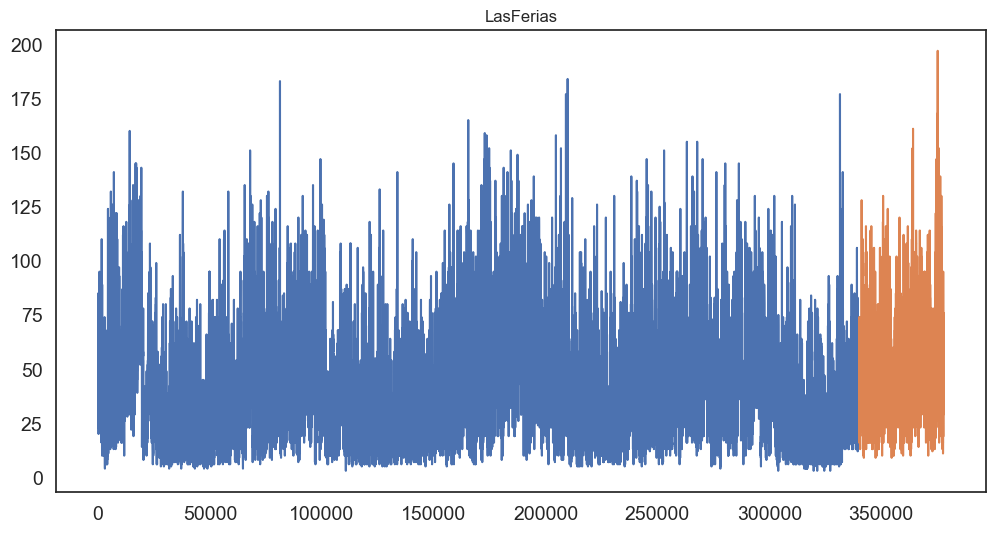

In [27]:
train_df[train_df.Estacion == station_test[1]]['ICA'].plot(figsize=(12, 6), title=station_test[0], fontsize=14, label='train')
test_df[test_df.Estacion == station_test[1]]['ICA'].plot(figsize=(12, 6), title=station_test[0], fontsize=14, label='test')

In [28]:
train_df[train_df.Estacion == station_test[6]]

,DateTime,Estacion,ICA
4,2020-01-01 01:00:00,Suba,66.0
16,2020-01-01 02:00:00,Suba,116.0
18,2020-01-01 03:00:00,Suba,158.0
31,2020-01-01 04:00:00,Suba,128.0
41,2020-01-01 05:00:00,Suba,108.0
...,...,...,...
339999,2023-09-15 17:00:00,Suba,22.0
340005,2023-09-15 18:00:00,Suba,17.0
340024,2023-09-15 19:00:00,Suba,23.0
340029,2023-09-15 20:00:00,Suba,54.0


In [ ]:
from auto_ts import auto_timeseries

# Suponiendo que tienes un DataFrame de pandas llamado train_df con las columnas 'DateTime' y 'ICA'
# y quieres ajustar un modelo para cada estación en station_test

model_station = {}

for station in station_test:
    model = auto_timeseries(score_type='rmse', forecast_period=30, non_seasonal_pdq=None, seasonal=True, seasonal_period=24, model_type='best', verbose=0)
    model.fit(traindata=train_df[train_df.Estacion == station][['DateTime', 'ICA']], ts_column='DateTime', target='ICA')
    model_station[station] = model


LasFerias
Start of Fit.....
    Target variable given as = ICA
Start of loading of data.....
    Inputs: ts_column = DateTime, sep = ,, target = ['ICA']
    Using given input: pandas dataframe...
    DateTime column exists in given train data...
    train data shape = (32493, 1)
Alert: Could not detect strf_time_format of DateTime. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding win

22:31:11 - cmdstanpy - INFO - Chain [1] start processing
22:31:12 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 19.00
    Std Deviation of actuals = 6.29
    Normalized RMSE (as pct of std dev) = 302%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:31:17 - cmdstanpy - INFO - Chain [1] start processing
22:31:17 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:33:01 - cmdstanpy - INFO - Chain [1] start processing
22:33:01 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 5.53
    Std Deviation of actuals = 5.95
    Normalized RMSE (as pct of std dev) = 93%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:33:06 - cmdstanpy - INFO - Chain [1] start processing
22:33:07 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:34:49 - cmdstanpy - INFO - Chain [1] start processing
22:34:50 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 15.40
    Std Deviation of actuals = 12.92
    Normalized RMSE (as pct of std dev) = 119%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 21673 Test Shape: 5


22:34:53 - cmdstanpy - INFO - Chain [1] start processing
22:34:53 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:36:31 - cmdstanpy - INFO - Chain [1] start processing
22:36:32 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 14.25
    Std Deviation of actuals = 13.78
    Normalized RMSE (as pct of std dev) = 103%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:36:37 - cmdstanpy - INFO - Chain [1] start processing
22:36:37 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:38:24 - cmdstanpy - INFO - Chain [1] start processing
22:38:25 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 20.71
    Std Deviation of actuals = 0.80
    Normalized RMSE (as pct of std dev) = 2588%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:38:30 - cmdstanpy - INFO - Chain [1] start processing
22:38:31 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:40:51 - cmdstanpy - INFO - Chain [1] start processing
22:40:52 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 8.35
    Std Deviation of actuals = 4.41
    Normalized RMSE (as pct of std dev) = 189%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:40:57 - cmdstanpy - INFO - Chain [1] start processing
22:40:57 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:42:53 - cmdstanpy - INFO - Chain [1] start processing
22:42:54 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 22.64
    Std Deviation of actuals = 5.60
    Normalized RMSE (as pct of std dev) = 404%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 32473 Test Shape: 5


22:42:59 - cmdstanpy - INFO - Chain [1] start processing
22:42:59 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:44:36 - cmdstanpy - INFO - Chain [1] start processing
22:44:37 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 14.88
    Std Deviation of actuals = 7.35
    Normalized RMSE (as pct of std dev) = 202%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 23713 Test Shape: 5


22:44:40 - cmdstanpy - INFO - Chain [1] start processing
22:44:41 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:45:57 - cmdstanpy - INFO - Chain [1] start processing
22:45:58 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 7.82
    Std Deviation of actuals = 4.87
    Normalized RMSE (as pct of std dev) = 160%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 14953 Test Shape: 5


22:46:00 - cmdstanpy - INFO - Chain [1] start processing
22:46:00 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:46:51 - cmdstanpy - INFO - Chain [1] start processing
22:46:51 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 22.55
    Std Deviation of actuals = 2.94
    Normalized RMSE (as pct of std dev) = 767%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 25897 Test Shape: 5


22:46:55 - cmdstanpy - INFO - Chain [1] start processing
22:46:55 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:48:22 - cmdstanpy - INFO - Chain [1] start processing


Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 6165 Test Shape: 5


22:48:22 - cmdstanpy - INFO - Chain [1] done processing
22:48:23 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 18.74
    Std Deviation of actuals = 5.42
    Normalized RMSE (as pct of std dev) = 346%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 6170 Test Shape: 5


22:48:23 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

22:48:44 - cmdstanpy - INFO - Chain [1] start processing
22:48:45 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 22.27
    Std Deviation of actuals = 14.03
    Normalized RMSE (as pct of std dev) = 159%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 26284 Test Shape: 5


22:48:49 - cmdstanpy - INFO - Chain [1] start processing
22:48:49 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
    Using smaller parameters for larger dataset with greater than 1000 samples
    Using smaller parameters for larger dataset with greater than 1000 samples
Exception occurred while building Auto SARIMAX model...
'DataFrame' object has no attribute 'append'
    Auto SARIMAX model error: predictions not available.

Skipping VAR Model since dataset is > 1000 rows and it will take too long


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating da

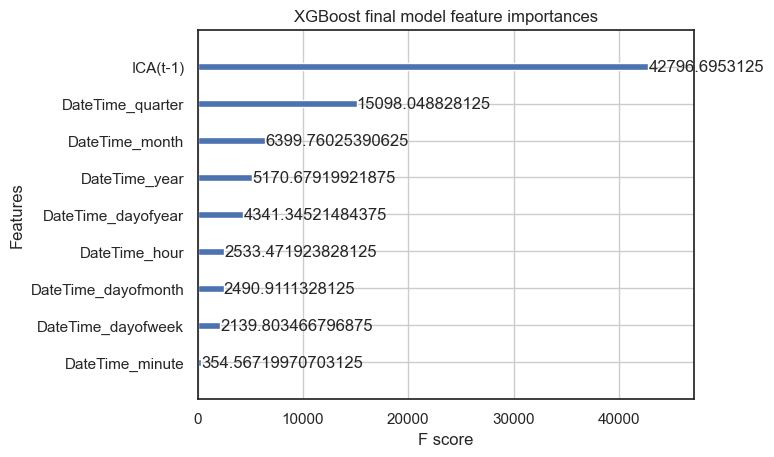

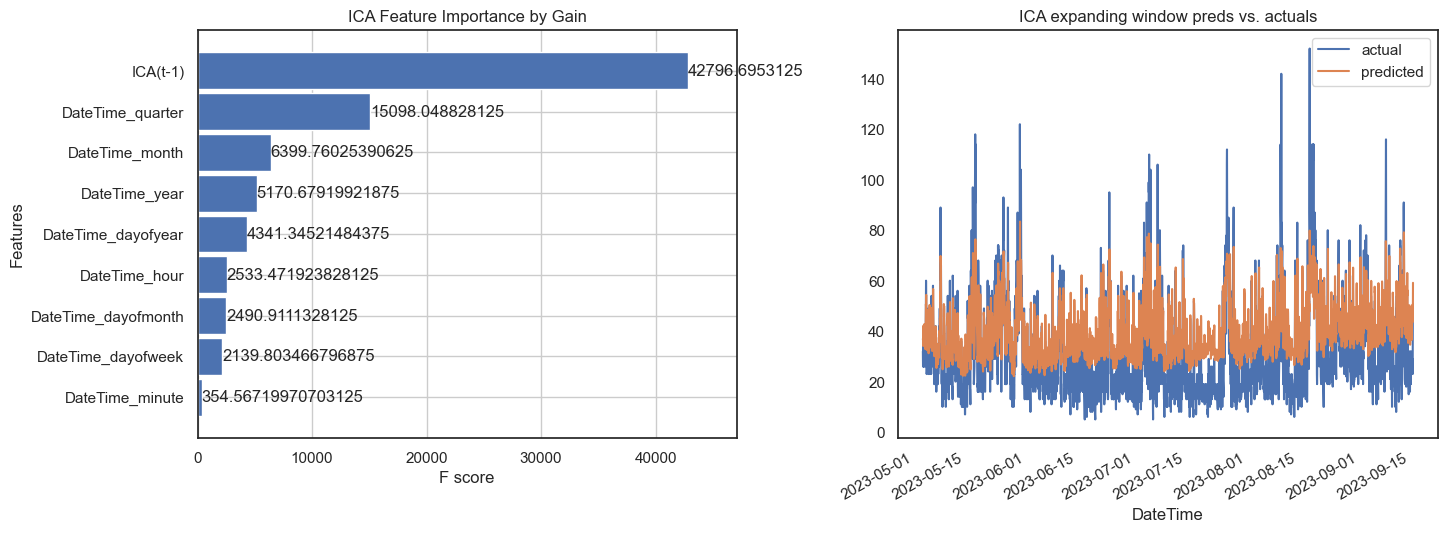

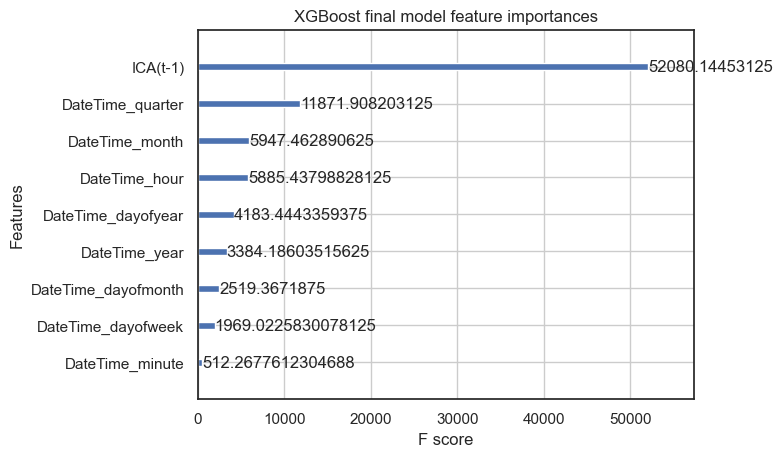

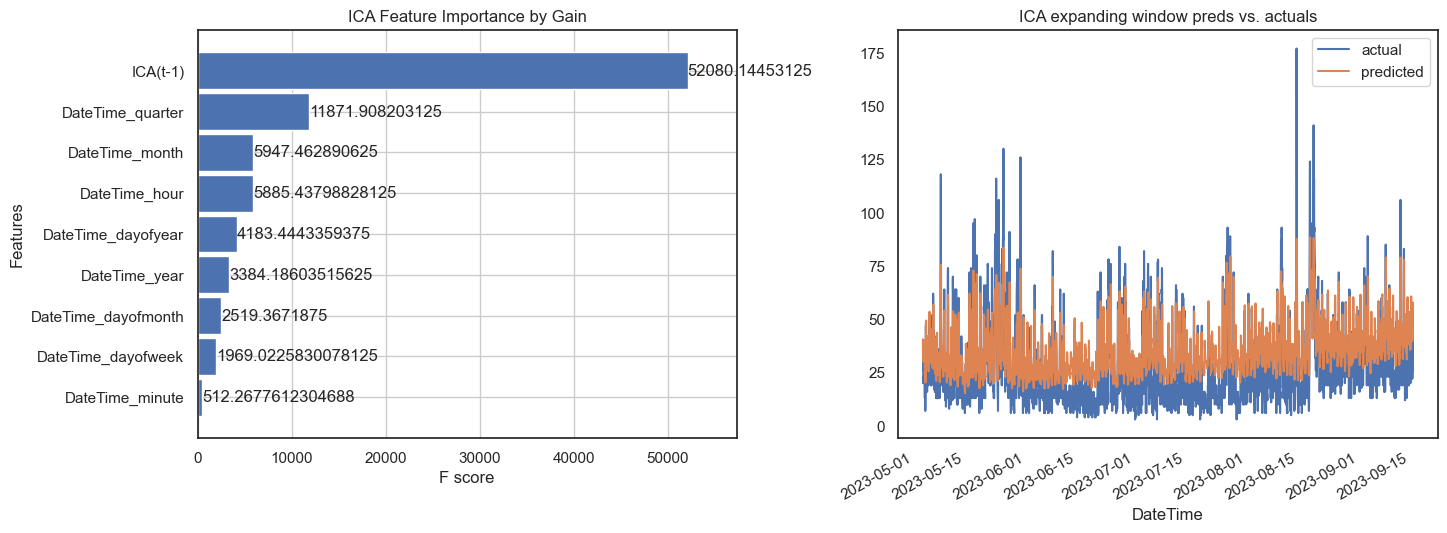

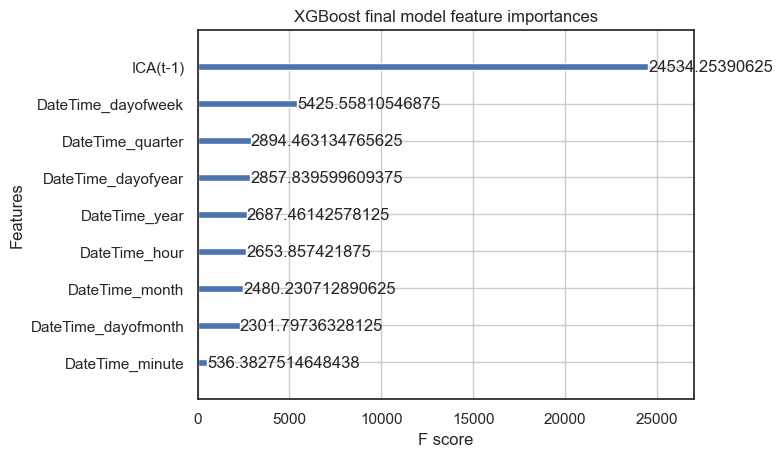

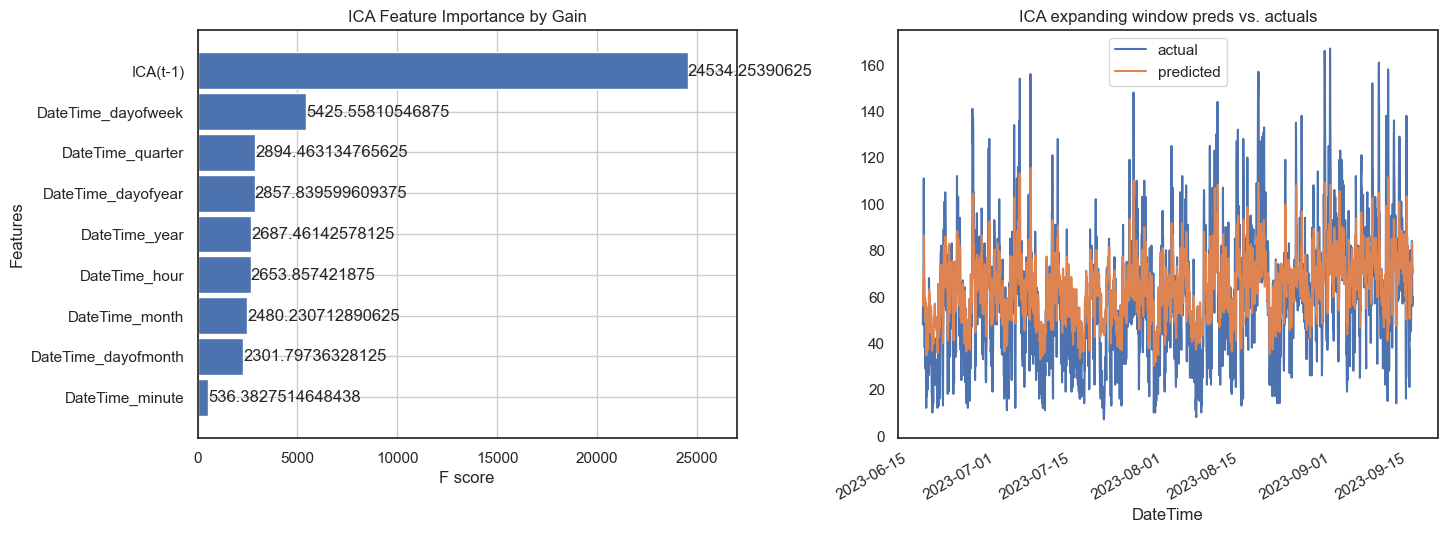

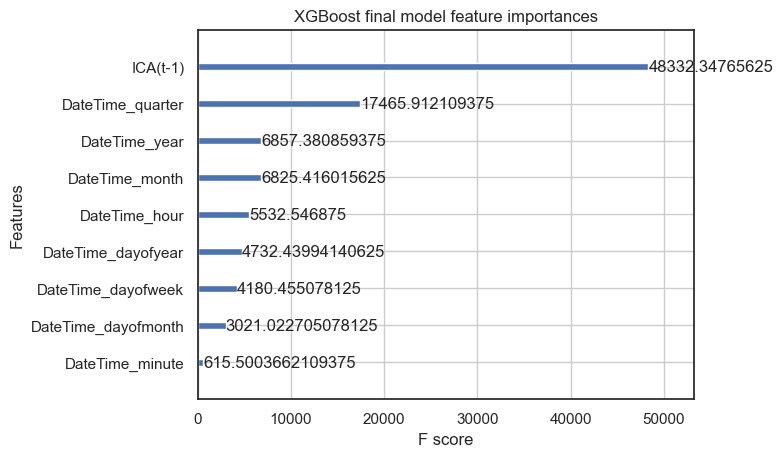

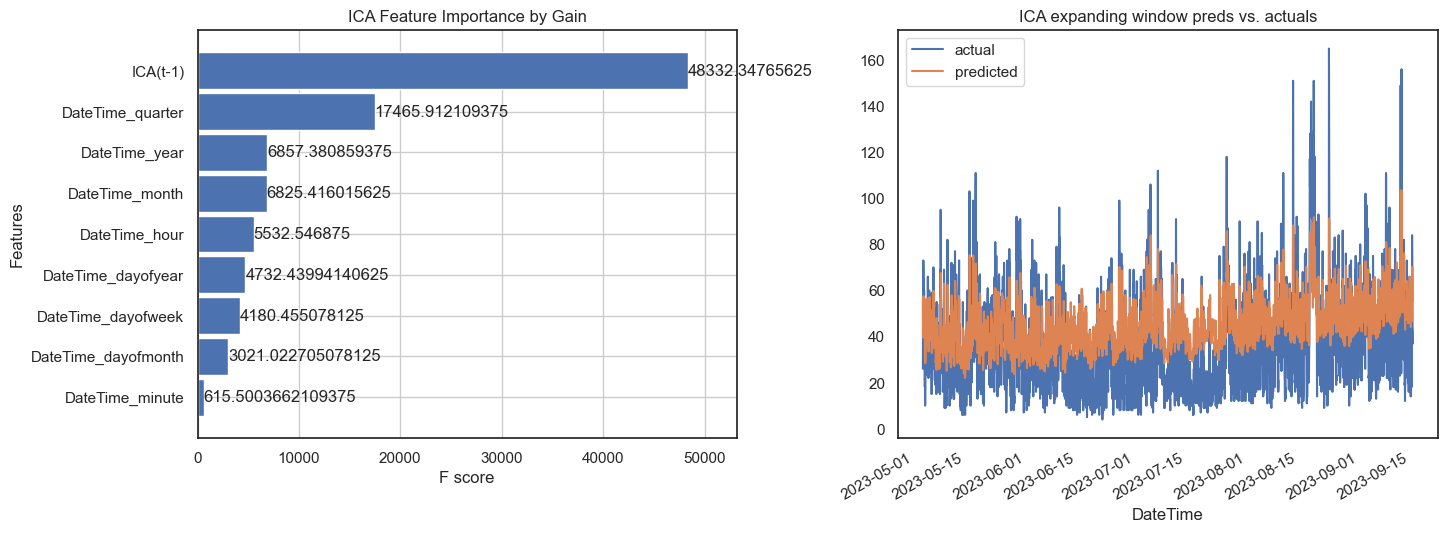

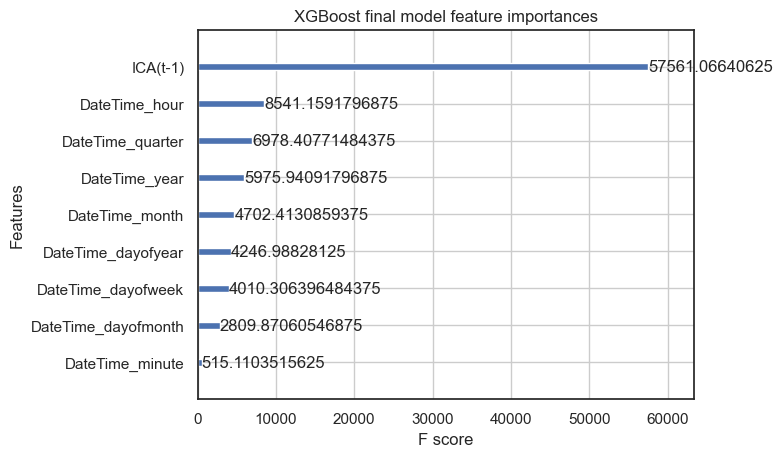

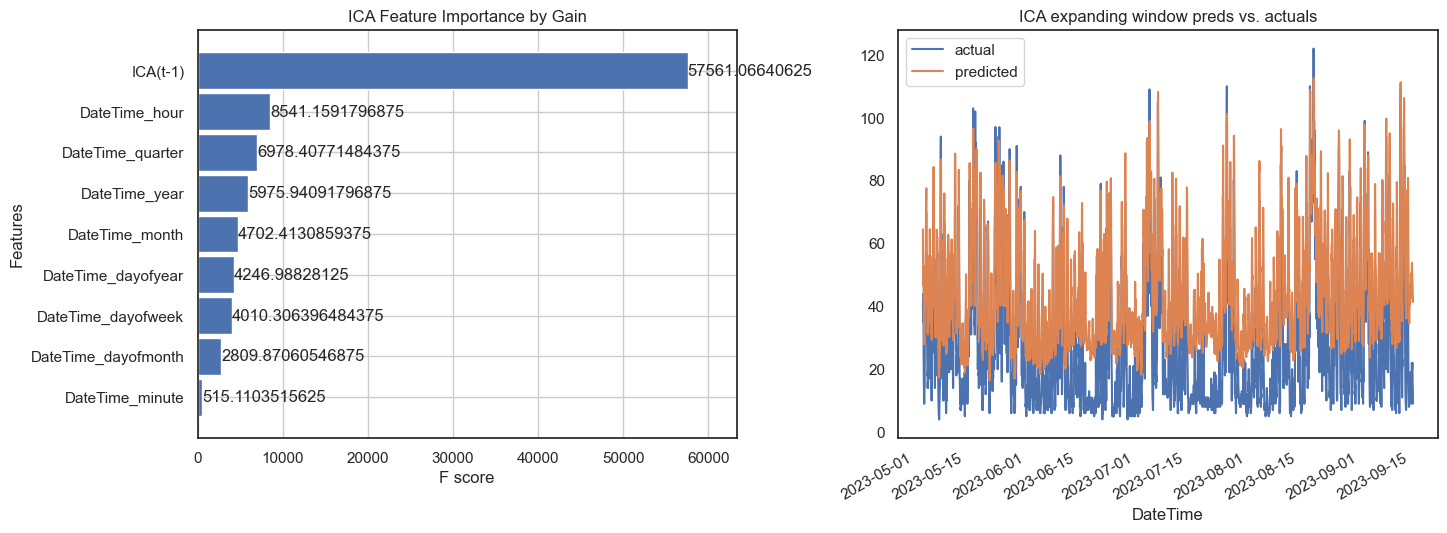

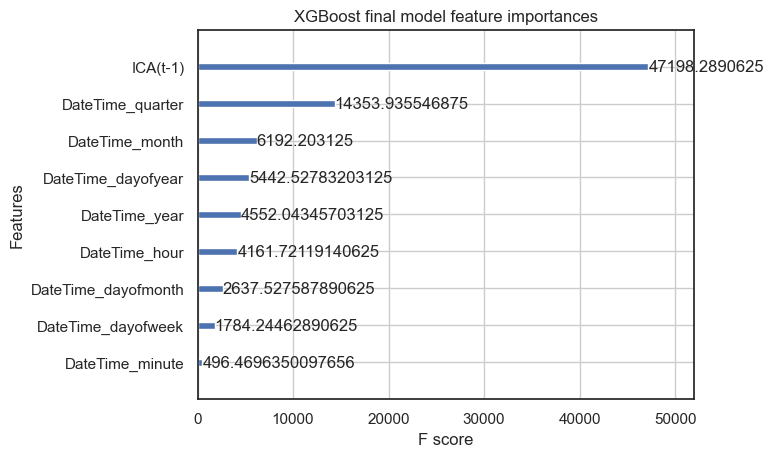

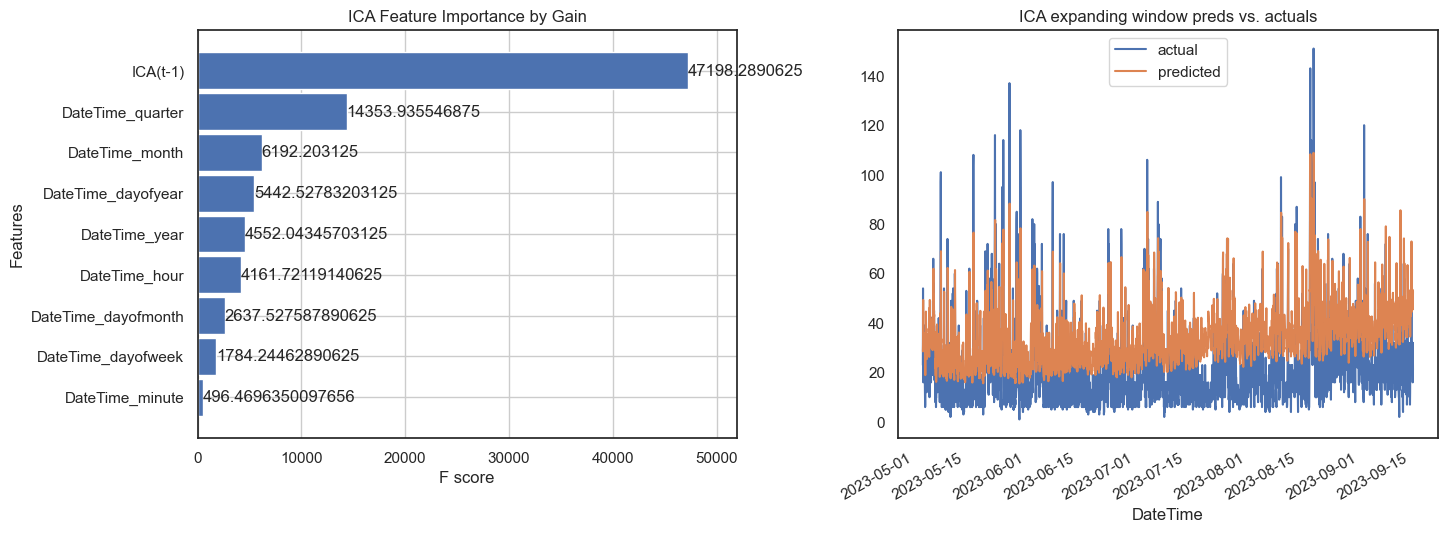

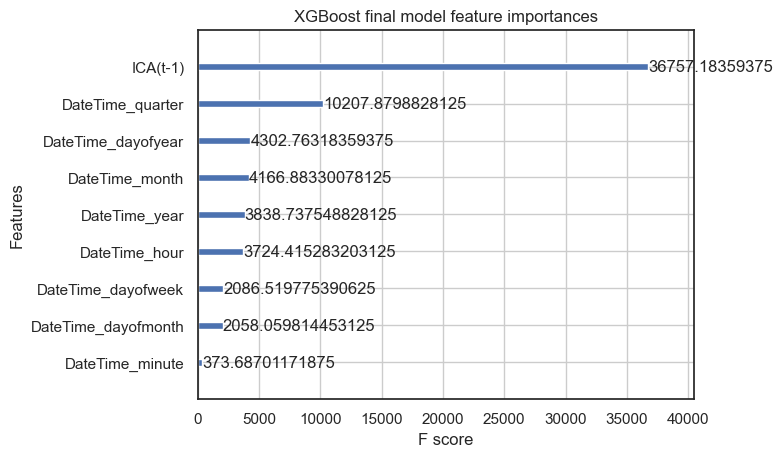

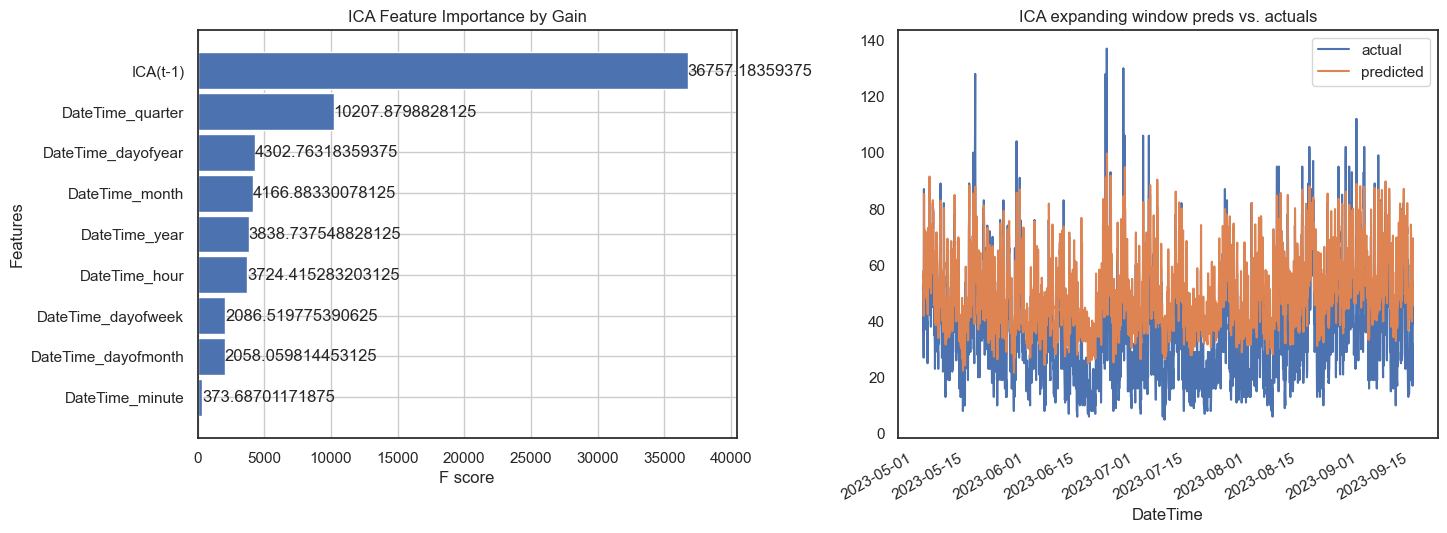

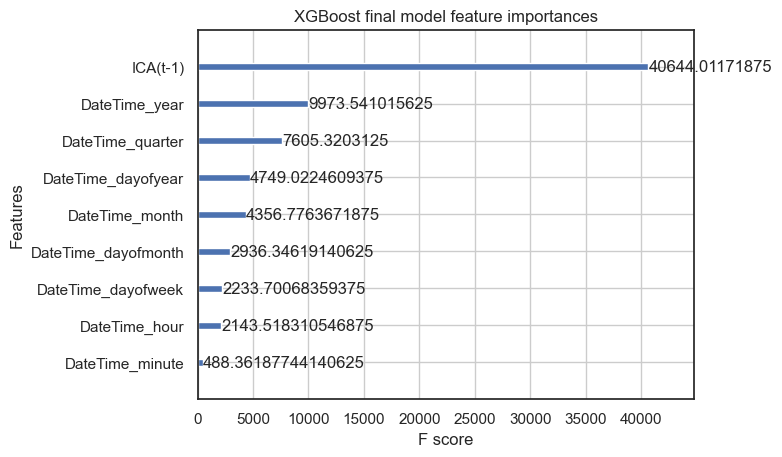

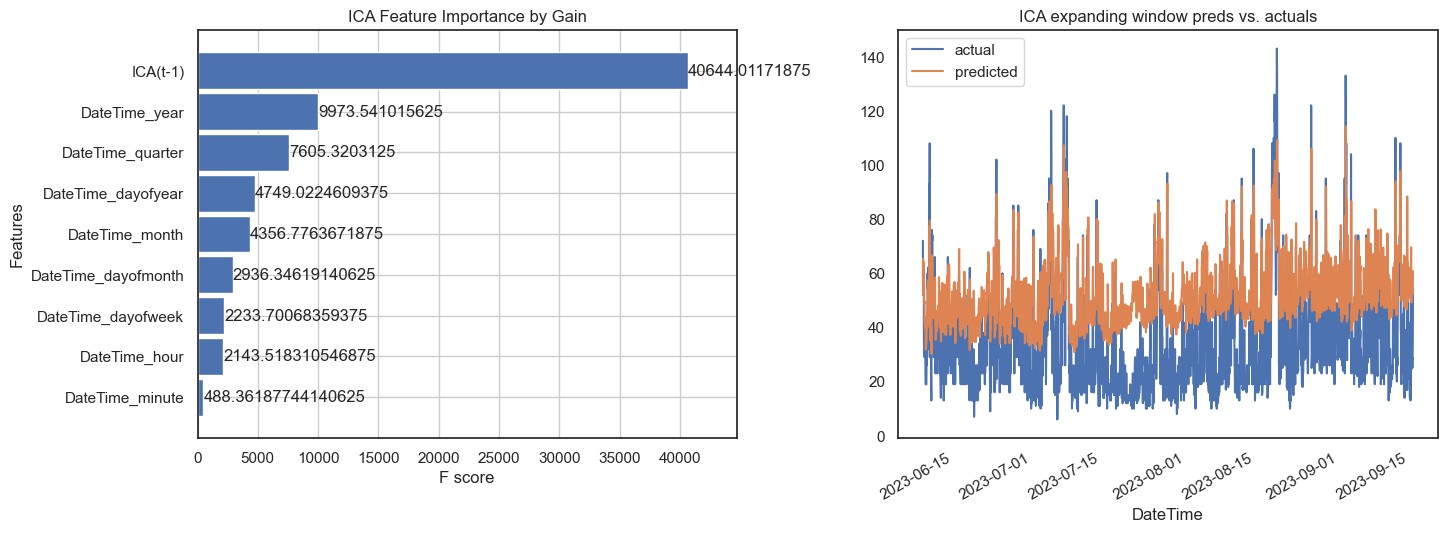

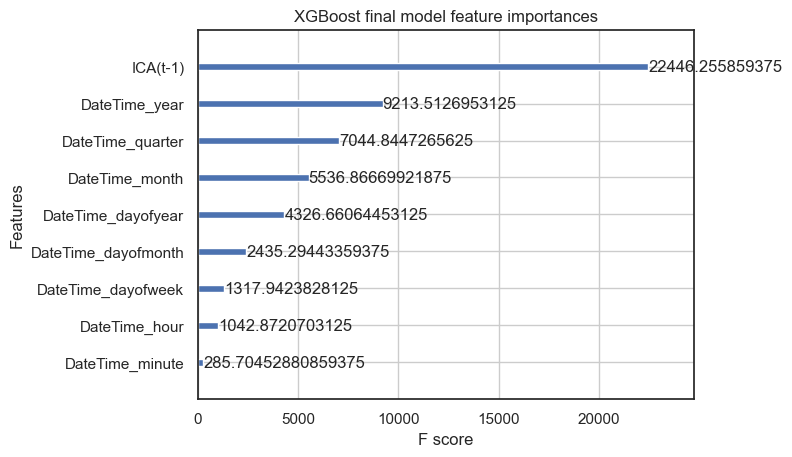

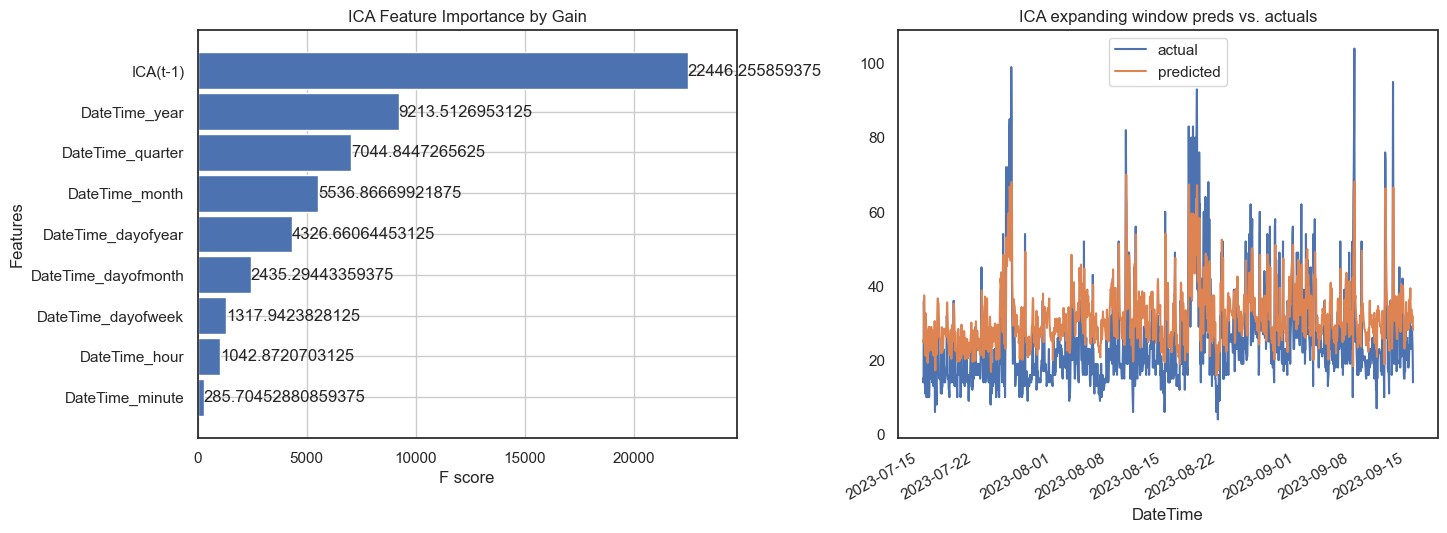

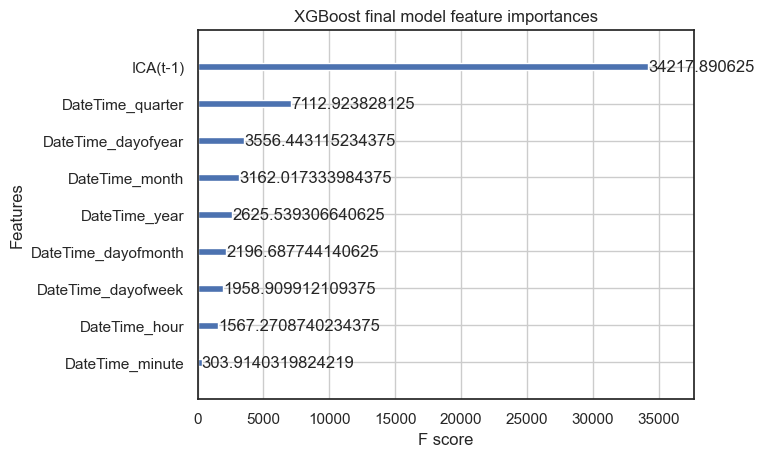

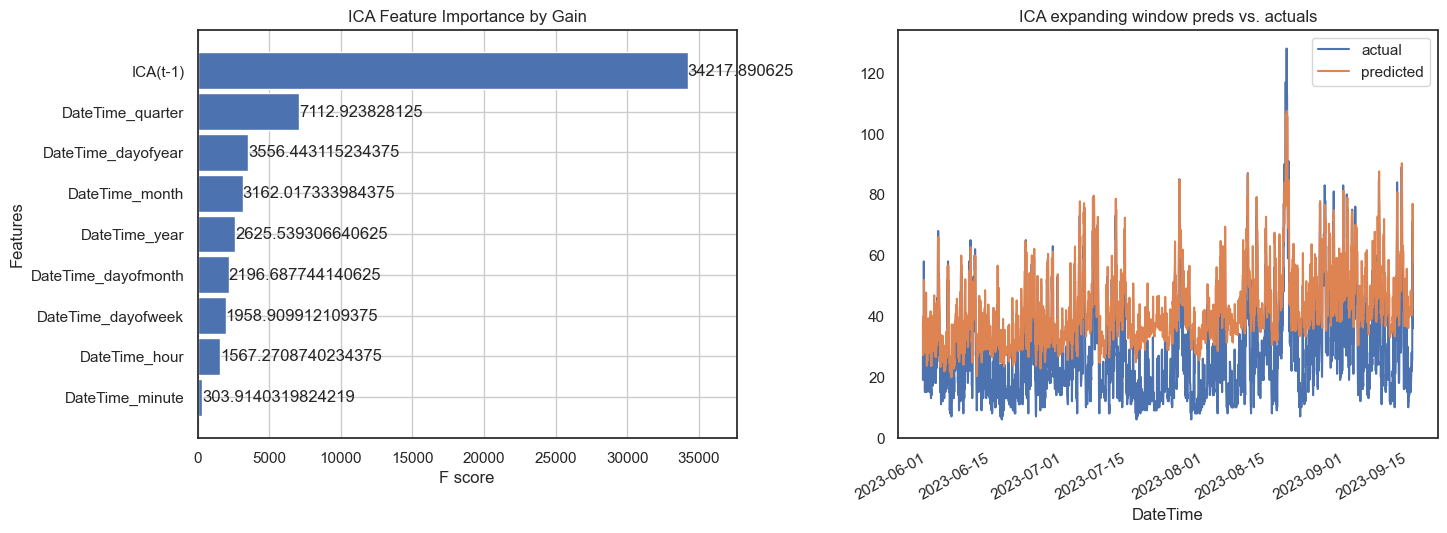

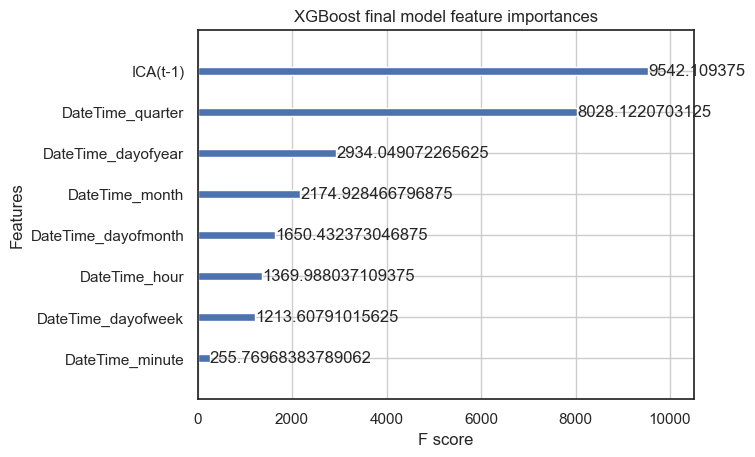

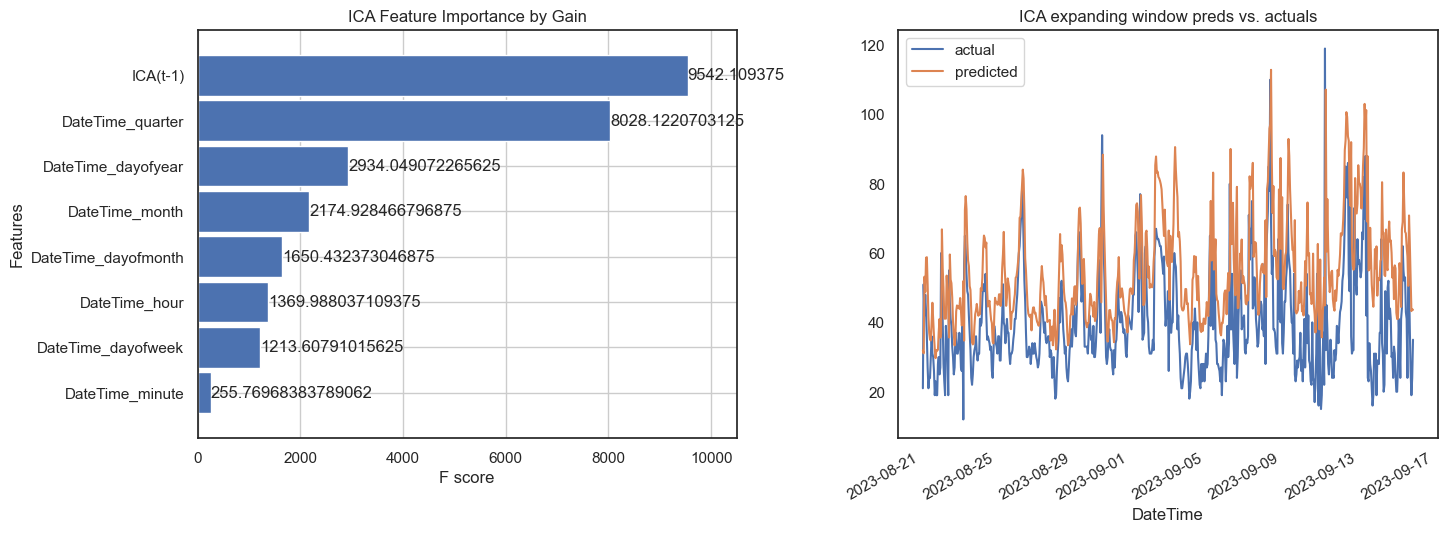

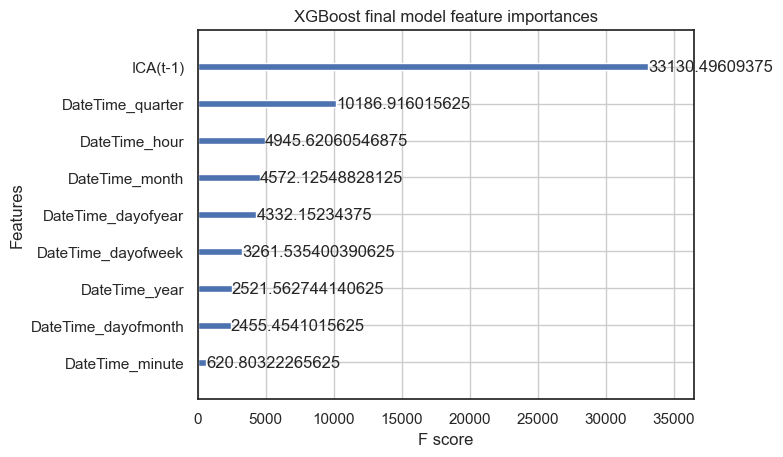

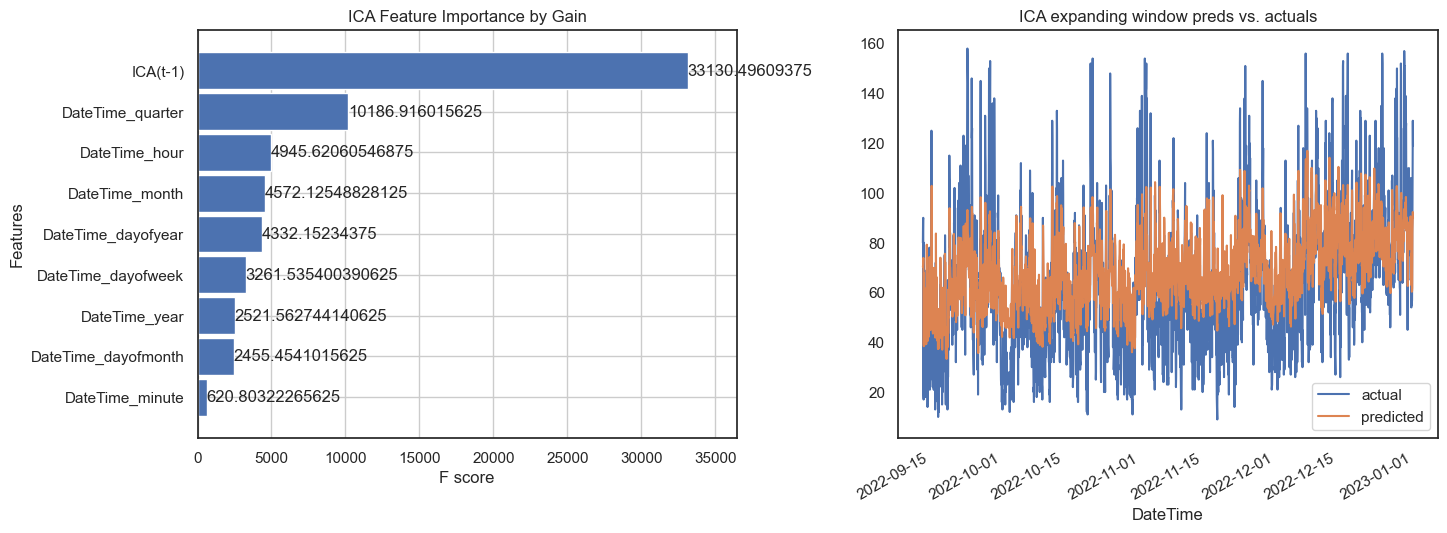

In [31]:
# El seasonal period es 24 porque es horario https://github.com/AutoViML/Auto_TS

train_df

model_station = {}

for station in station_test:
    print(station)
    model = auto_timeseries(
        score_type='rmse',
        time_interval='H',
        non_seasonal_pdq=None, 
        seasonality=False,
        seasonal_period=24,
        model_type=['best'],
        strf_time_format='%Y-%m-%d %H:%M:%S',  # Formato de fecha y hora
        verbose=0,
    )
    model.fit(traindata=train_df[train_df.Estacion == station][['DateTime', 'ICA']], ts_column='DateTime', target='ICA')
    model_station[station] = model


In [34]:
predictions = model.predict(
    testdata=test_df[test_df.Estacion == station_test[0]],  # Datos de prueba, puede ser un dataframe
    model='best'  # Modelo a utilizar, en este caso, se usará el mejor modelo seleccionado por Auto_TS
)


Predicting using test dataframe shape = (3435, 3) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for DateTime. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

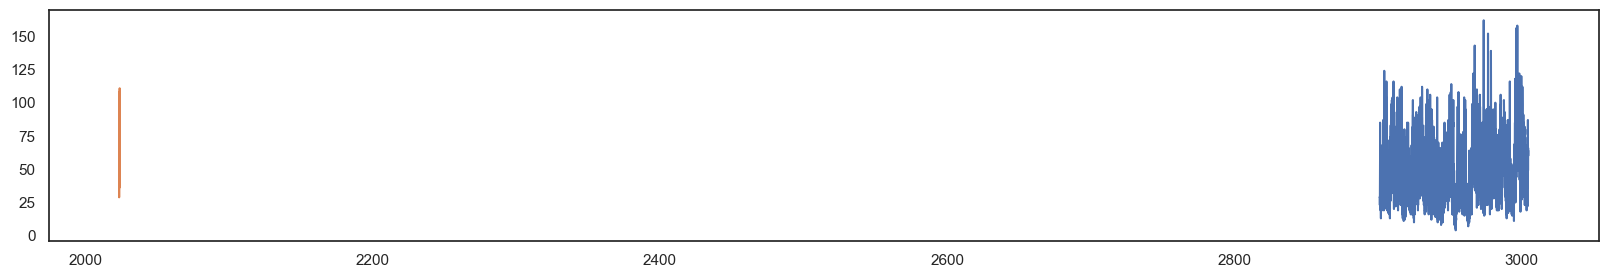

In [38]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(test_df[test_df.Estacion == station_test[0]]['ICA'])
ax.plot(predictions.)

In [ ]:
conda install -c conda-forge prophet

In [ ]:
# El seasonal period es 60 porque es horario https://github.com/AutoViML/Auto_TS, creo que aquí deberían cambiar el DateTime a horario
model = auto_timeseries(score_type='rmse', forecast_period=30, non_seasonal_pdq=None, seasonal=True, seasonal_period=60, model_type='best', verbose=0)
model.fit(traindata=train_df[train_df.Estacion == station_test[1]][['DateTime', 'ICA']], ts_column='DateTime', target='ICA')

In [ ]:
pip install pycaret

In [32]:
print("Hi")

Hi
